In [6]:
import os
import numpy as np
import jax, jax.numpy as jnp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['figure.facecolor'] = '#FFFFFF'

In [14]:
def calculate_nwr(data):
    diff = (data - np.mean(data)) / np.mean(data)
    weight = np.where(diff < 0, 1, 0)
    return np.sum(weight * (diff**2))


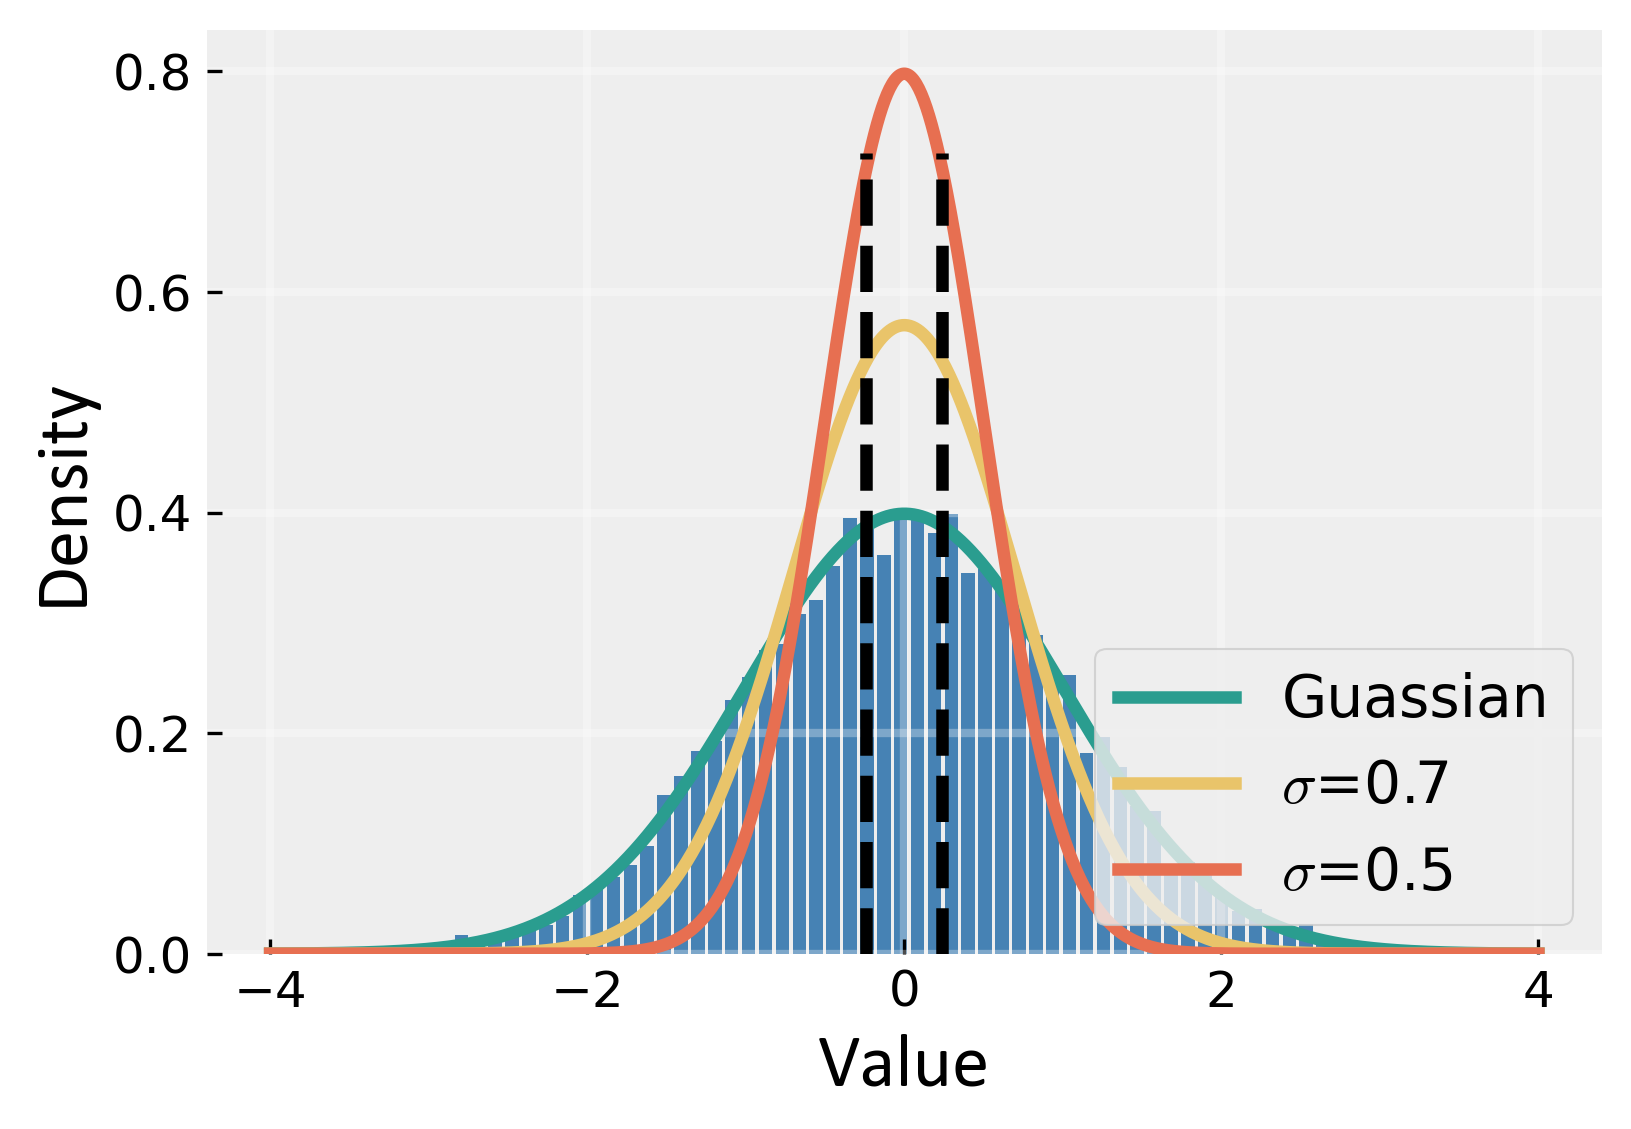

In [49]:
# when the negative side variance grows in the normal distribution 
font1 = {'family' : 'calibri',
    'weight' : 'normal',
    'size'   : 18,
    }
    
mu = 0
sigma = 1
signa_2 = 0.7
signa_3 = 0.5
fig, ax = plt.subplots(figsize=(6,4))
data = np.random.normal(mu, sigma, size=10000)

plt.grid(color='white', linestyle='-', linewidth=2, alpha=0.3)
plt.hist(data, bins=70, density=True, alpha=1, rwidth=0.8, color='steelblue')

# Plot the probability density function of the normal distribution using Matplotlib
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x - mu)**2/(2*sigma**2))
pdf_2 = 1/(signa_2*np.sqrt(2*np.pi)) * np.exp(-(x - mu)**2/(2*signa_2**2))
pdf_3 = 1/(signa_3*np.sqrt(2*np.pi)) * np.exp(-(x - mu)**2/(2*signa_3**2))

ax.plot(x, pdf, color='#2a9d8f', linewidth=3, label='Guassian')
ax.plot(x, pdf_2, color='#e9c46a', linewidth=3, label=f'$\sigma$={signa_2}')
ax.plot(x, pdf_3, color='#e76f51', linewidth=3, label=f'$\sigma$={signa_3}')
# Find the x value where pdf_2 is truncated
x_trunc = np.sqrt(-2*signa_2**2*np.log(0.47*signa_2*np.sqrt(2*np.pi)))

# Add a vertical line at the truncated x value
x_trunc = 0.24
y_trunc = 1/(signa_3*np.sqrt(2*np.pi)) * np.exp(-(x_trunc - mu)**2/(2*signa_3**2))
ax.axvline(x=x_trunc, ymax=y_trunc/0.82, color='black', linewidth=3,linestyle='--', alpha=1)
ax.axvline(x=-x_trunc, ymax=y_trunc/0.82, color='black', linewidth=3,linestyle='--', alpha=1)
# Fill the area under the pdf_2 curve where it intersects with the horizontal line at y=0.47

my_y_ticks = np.arange(0, 0.801, 0.2)
my_x_ticks = np.arange(-4, 4.01, 2)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_yticks(my_y_ticks)
ax.set_xticks(my_x_ticks)
ax.set_xlabel('Value', fontdict=font1)
ax.set_ylabel('Density', fontdict=font1)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Generate 1000 data points with normal distribution

# ax.annotate('NWV=435', xy=(x[500], pdf[500]), xytext=(x[500]-3, pdf[500]+0.1), fontsize=font1['size']-8,
#             color='red',
#             arrowprops=dict(facecolor='black', shrink=1))

# plt.title('Histogram and Probability Density Function of Normal Distribution')
ax.legend(loc=4, fontsize=font1['size']-4) 
ax.grid(color='white', linestyle='-', linewidth=2, alpha=0.3)

# Show the plot
plt.savefig("./images/guassian_negative_weight_variance.pdf", dpi=200)

In [51]:
print(calculate_nwr(pdf))
print(calculate_nwr(pdf_2))
print(calculate_nwr(pdf_3))

434.82989631911994
576.8324556099531
680.441547582029
